In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from sklearn.model_selection import train_test_split

# Header1

In [4]:
df = pd.read_csv('../data/raw/yellow_tripdata_2015-12-sample.csv')
df.head()

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,trip_time
0,0,2015-12-01 00:00:00,2015-12-01 00:05:16,5,0.96,-73.979942,40.765381,-73.966309,40.763088,5.5,316.0
1,1,2015-12-01 00:00:47,2015-12-01 00:12:34,1,5.49,-73.942368,40.832970,-73.989220,40.773918,17.0,707.0
2,2,2015-12-01 00:00:50,2015-12-01 00:02:57,1,0.40,-73.982895,40.739662,-73.986649,40.734097,3.5,127.0
3,3,2015-12-04 19:09:14,2015-12-04 19:11:16,1,0.20,-73.981255,40.764538,-73.984016,40.761917,3.5,122.0
4,4,2015-12-04 19:09:45,2015-12-04 19:25:08,4,1.70,-74.004501,40.741898,-73.983543,40.744278,11.0,923.0


In [5]:
df['delta_lon'] = df.pickup_longitude - df.dropoff_longitude
df['delta_lat'] = df.pickup_latitude - df.dropoff_latitude

def calculate_direction(d_lon, d_lat):
    result = np.zeros(len(d_lon))
    l = np.sqrt(d_lon**2 + d_lat**2)
    result[d_lon>0] = (180/np.pi)*np.arcsin(d_lat[d_lon>0]/l[d_lon>0])
    idx = (d_lon<0) & (d_lat>0)
    result[idx] = 180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    idx = (d_lon<0) & (d_lat<0)
    result[idx] = -180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    return result

df['direction'] = calculate_direction(df.delta_lon, df.delta_lat)

df.head()

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,trip_time,delta_lon,delta_lat,direction
0,0,2015-12-01 00:00:00,2015-12-01 00:05:16,5,0.96,-73.979942,40.765381,-73.966309,40.763088,5.5,316.0,-0.013634,0.002293,170.454509
1,1,2015-12-01 00:00:47,2015-12-01 00:12:34,1,5.49,-73.942368,40.832970,-73.989220,40.773918,17.0,707.0,0.046852,0.059052,51.571134
2,2,2015-12-01 00:00:50,2015-12-01 00:02:57,1,0.40,-73.982895,40.739662,-73.986649,40.734097,3.5,127.0,0.003754,0.005566,56.002913
3,3,2015-12-04 19:09:14,2015-12-04 19:11:16,1,0.20,-73.981255,40.764538,-73.984016,40.761917,3.5,122.0,0.002762,0.002621,43.497904
4,4,2015-12-04 19:09:45,2015-12-04 19:25:08,4,1.70,-74.004501,40.741898,-73.983543,40.744278,11.0,923.0,-0.020958,-0.002380,-173.520202


In [17]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['day_of_week'] = df['tpep_pickup_datetime'].dt.weekday

df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour

df.head()

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,trip_time,delta_lon,delta_lat,direction,day_of_week,hour_of_day
0,0,2015-12-01 00:00:00,2015-12-01 00:05:16,5,0.96,-73.979942,40.765381,-73.966309,40.763088,5.5,316.0,-0.013634,0.002293,170.454509,1,0
1,1,2015-12-01 00:00:47,2015-12-01 00:12:34,1,5.49,-73.942368,40.832970,-73.989220,40.773918,17.0,707.0,0.046852,0.059052,51.571134,1,0
2,2,2015-12-01 00:00:50,2015-12-01 00:02:57,1,0.40,-73.982895,40.739662,-73.986649,40.734097,3.5,127.0,0.003754,0.005566,56.002913,1,0
3,3,2015-12-04 19:09:14,2015-12-04 19:11:16,1,0.20,-73.981255,40.764538,-73.984016,40.761917,3.5,122.0,0.002762,0.002621,43.497904,4,19
4,4,2015-12-04 19:09:45,2015-12-04 19:25:08,4,1.70,-74.004501,40.741898,-73.983543,40.744278,11.0,923.0,-0.020958,-0.002380,-173.520202,4,19


In [18]:
X = df[['passenger_count','trip_distance','trip_time','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','direction','day_of_week','hour_of_day']]
y = df[['fare_amount']]

X.head()

,passenger_count,trip_distance,trip_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,direction,day_of_week,hour_of_day
0,5,0.96,316.0,-73.979942,40.765381,-73.966309,40.763088,170.454509,1,0
1,1,5.49,707.0,-73.942368,40.832970,-73.989220,40.773918,51.571134,1,0
2,1,0.40,127.0,-73.982895,40.739662,-73.986649,40.734097,56.002913,1,0
3,1,0.20,122.0,-73.981255,40.764538,-73.984016,40.761917,43.497904,4,19
4,4,1.70,923.0,-74.004501,40.741898,-73.983543,40.744278,-173.520202,4,19


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


C:\Users\Cathal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[3.18588908e-04 7.63060600e-01 1.74457415e-01 1.15104450e-02
 7.97408135e-03 3.63435472e-02 3.55110274e-03 9.50867220e-04
 6.29849545e-04 1.20350300e-03]


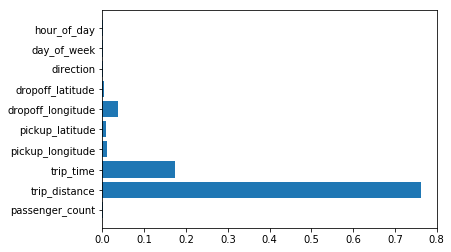

In [21]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=6, random_state=0,n_estimators=100)

regr.fit(X_train,y_train)
print(regr.feature_importances_)
plt.barh(range(len(X_train.columns)), regr.feature_importances_)
plt.yticks(range(len(X_train.columns)), list(X_train));

In [22]:
from sklearn.metrics import mean_squared_error
y_pred = regr.predict(X_test)


print(np.sqrt(mean_squared_error(y_test, y_pred)))

4.7793882127762615
